## Confusion Matrix of Wine Dataset using k-NN

분류 모델의 성능을 측정하기 위한 confusion matrix

실제 타겟의 값을 분류 모델을 통해 예측한 값과 비교

Confusion matrix를 통해 분류 모델의 성능을 확인할 수 있으며, 어떤 종류의 오류가 발생하는지 확인 가능

<span style="color: #2D3748; background-color:#fff5b1;">Test size 0.2로 10번 반복 실험한 결과 setosa에 대한 분류는 잘 하지만 versicolor와 virginica를 잘못 분류하는 경우가 발생하였다.</span>

<span style="color: #2D3748; background-color:#fff5b1;">반복 실험 동안 계속 잘 못 분류되는 데이터를 분석한 결과 virginica label을 가진 데이터가 versicolor 데이터 특징과 거의 동일하기 때문에 분류하지 못하였다.</span>

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [66]:
wine = load_wine()

features = wine.data
target =  wine.target
target_names =  wine.target_names

[0]  /  1


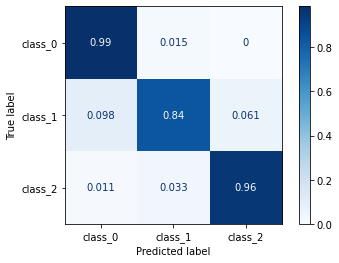

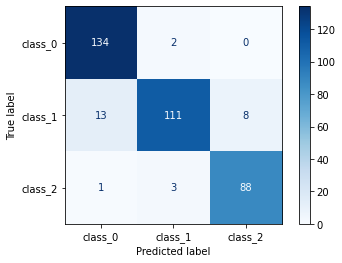

In [67]:
from collections import Counter

max_seed = 10

predict_list = []
label_list = []
error_value = []
error_seed = []
error = []
error_list = []

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train.T)}, n_jobs=-1)
    knn.fit(x_train, y_train)
    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    equal = np.equal(predict, y_test)
    idx = np.where(equal == False)
    if len(idx[0]) != 0:
        for i in idx[0]:
            values = x_test[i]
            values_seed = np.append(values, seed)
            values = np.append(values, y_test[i])
            error_value.append(values)
            error_seed.append(values_seed)
    if seed == 3:
        predict = knn.predict(np.array(x_test[30]).reshape(1, -1))
        print(predict, " / ", y_test[30])

error_value = np.array(error_value)
counter = Counter(map(tuple, error_value.tolist()))

max_list = list(counter.values())
max_count = np.max(max_list)

for key, value in counter.items():
    if value == max_count:
        error.append(key)

error_seed = np.array(error_seed)
error = np.array(error)

for idx, e_list in enumerate(error):
    for s_idx, seed_list in enumerate(error_seed):
        error_equal = np.array_equal(seed_list[:4], e_list[:4])
        if error_equal:
            add_seed = np.append(error[idx], seed_list[-1])
            error_list.append(add_seed)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

In [68]:
from scipy.spatial.distance import mahalanobis
np.set_printoptions(precision=6, suppress=True)

k = 3

for e in error_list:
    print("Seed : ", int(e[-1]))
    print("Error data value : ", e[:13], " / label : ", int(e[-2]))

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=int(e[-1]), shuffle=True)
    knn = KNeighborsClassifier(k, weights='distance', metric='mahalanobis', metric_params={'V': np.cov(x_train.T)}, n_jobs=-1)
    knn.fit(x_train, y_train)

    dist_list, index_list = knn.kneighbors(np.array(e[:13]).reshape(1, -1), k)

    for s, index in enumerate(index_list[0]):
        print(s+1, "th close distance value : ", x_train[index], " / label : ", y_train[index], " / distance : ", dist_list[0][s])
    print("-----" * 11)

Seed :  2
Error data value :  [ 11.76   2.68   2.92  20.   103.     1.75   2.03   0.6    1.05   3.8
   1.23   2.5  607.  ]  / label :  1
1 th close distance value :  [ 13.28   1.64   2.84  15.5  110.     2.6    2.68   0.34   1.36   4.6
   1.09   2.78 880.  ]  / label :  0  / distance :  3.962999179483386
2 th close distance value :  [ 11.84   2.89   2.23  18.   112.     1.72   1.32   0.43   0.95   2.65
   0.96   2.52 500.  ]  / label :  1  / distance :  4.110589914801396
3 th close distance value :  [ 12.08   1.83   2.32  18.5   81.     1.6    1.5    0.52   1.64   2.4
   1.08   2.27 480.  ]  / label :  1  / distance :  4.229801443539897
-------------------------------------------------------
Seed :  3
Error data value :  [ 11.76   2.68   2.92  20.   103.     1.75   2.03   0.6    1.05   3.8
   1.23   2.5  607.  ]  / label :  1
1 th close distance value :  [ 13.28   1.64   2.84  15.5  110.     2.6    2.68   0.34   1.36   4.6
   1.09   2.78 880.  ]  / label :  0  / distance :  4.165088533